In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re as ree
import numpy as np

In [2]:
path = r"H:\Economics\Finance(Prof.Heidari-Aghajanzadeh)\Data\Connected stocks\\"

In [3]:
m = 10

In [4]:
    df3 = pd.DataFrame()
    for i in range(m):
        print(i+1)
        t = pd.read_csv(path + "PartedNormalzedFCAP6.1-Part" + str(i+1)+".csv")
        df3 = df3.append(t)

1
2
3
4
5
6
7
8
9
10


In [5]:
del t

In [6]:
n1 = path + "WeeklyNormalzedFCAP6.1" +".csv"
n2 = path + "MonthlyNormalzedFCAP6.1" +".csv"
df2 = pd.read_csv(n2)
print('n2 Done')
df1 = pd.read_csv(n1)
print('n1 Done')

n2 Done
n1 Done


In [7]:
n = path + "Holder_Residual" + ".csv"
df = pd.read_csv(n)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
SId = pd.read_csv(path + "SId" + ".csv")
SData = df.groupby('symbol')[['Percentile_Rank']].mean().sort_values(by = ['Percentile_Rank']).reset_index()
SData = SData.merge(SId)
SData['Rank'] = SData.Percentile_Rank.rank() 
SData['GRank'] = 0
for i in range(9):
    t = i+1
    tempt = (SData['Rank'].max())/10
    SData.loc[SData['Rank']>tempt*t,'GRank'] = t

In [9]:
for a in [df1,df2]:
    mapingdict = dict(zip(SData.id, SData.GRank))
    a['GRank_x'] = a['id_x'].map(mapingdict)
    a['GRank_y'] = a['id_y'].map(mapingdict)
    a['SameGRank'] = 0
    a.loc[a.GRank_x == a.GRank_y,'SameGRank'] = 1
    

In [10]:
# df2.to_csv(n2,index = False)
# df1.to_csv(n1,index = False)


In [11]:
df2[df2.SameGRank == 1]

,date,jalaliDate,id_x,id_y,week_of_year,month_of_year,year_of_year,group_name_x,group_name_y,Ret_x,...,id,FCAP*,FCA*,WeeklyFCAP*,WeeklyFCA*,MonthlyFCAP*,MonthlyFCA*,GRank_x,GRank_y,SameGRank
692,20200831,13990610,0,216,36,8,2020,انبوه سازی، املاک و مستغلات,سیمان، آهک و گچ,-0.691330,...,17,-0.016742,-0.203858,-0.048335,-0.234216,-0.050200,-0.242356,2,2,1
693,20200930,13990709,0,216,40,9,2020,انبوه سازی، املاک و مستغلات,سیمان، آهک و گچ,-0.271523,...,17,0.145830,-0.104453,0.138134,-0.100928,0.034132,-0.184464,2,2,1
694,20201031,13990810,0,216,44,10,2020,انبوه سازی، املاک و مستغلات,سیمان، آهک و گچ,-4.773552,...,17,0.157288,-0.009126,0.154121,-0.009377,0.133193,-0.091675,2,2,1
695,20201116,13990826,0,216,46,11,2020,انبوه سازی، املاک و مستغلات,سیمان، آهک و گچ,4.795512,...,17,0.181697,0.021443,0.147591,-0.021956,0.148724,-0.022609,2,2,1
1292,20160229,13941210,10,31,8,2,2016,مخابرات,عرضه برق، گاز، بخاروآب گرم,1.688491,...,38,0.157925,0.049427,0.223245,0.127348,0.222108,0.131602,9,9,1
1293,20160328,13950109,10,31,12,3,2016,مخابرات,عرضه برق، گاز، بخاروآب گرم,-0.546448,...,38,0.777268,0.764260,0.776068,0.757585,0.652510,0.629679,9,9,1
1294,20160410,13950122,10,31,14,4,2016,مخابرات,عرضه برق، گاز، بخاروآب گرم,-3.445875,...,38,0.705871,0.693526,0.674459,0.663221,0.680633,0.664780,9,9,1
1295,20160515,13950226,10,31,18,5,2016,مخابرات,عرضه برق، گاز، بخاروآب گرم,1.362725,...,38,0.452680,0.497635,0.498554,0.519370,0.502928,0.515153,9,9,1
1296,20160629,13950409,10,31,26,6,2016,مخابرات,عرضه برق، گاز، بخاروآب گرم,-0.096525,...,38,0.531159,0.513051,0.529895,0.523476,0.517781,0.509436,9,9,1
1297,20160731,13950510,10,31,30,7,2016,مخابرات,عرضه برق، گاز، بخاروآب گرم,-0.319781,...,38,0.533650,0.529758,0.514681,0.511932,0.516820,0.525159,9,9,1


In [12]:
timeId = pd.read_csv(path + "timeId.csv")

In [13]:
df3 = df3[df3.FCAPf<1]
df3 = df3[df3.MonthlyFCAPf<1]
df3 = df3[df3.WeeklyFCAPf<1]
df1 = df1[df1.FCAPf<1]
df1 = df1[df1.MonthlyFCAPf<1]
df1 = df1[df1.WeeklyFCAPf<1]
df2 = df2[df2.FCAPf<1]
df2 = df2[df2.MonthlyFCAPf<1]
df2 = df2[df2.WeeklyFCAPf<1]



In [14]:
df1.drop_duplicates('id').groupby('sgroup').size()

sgroup
0    9166
1    1144
dtype: int64

In [15]:
df1.drop_duplicates('id').groupby('Holder_act').size()

Holder_act
0    7548
1    2762
dtype: int64

In [16]:
df1.drop_duplicates('id').groupby('sBgroup').size()

sBgroup
0    9136
1    1174
dtype: int64

In [17]:
len(set(df[df.BGId.isnull()].symbol))

270

In [18]:
df1.columns

Index(['date', 'jalaliDate', 'id_x', 'id_y', 'week_of_year', 'month_of_year',
       'year_of_year', 'group_name_x', 'group_name_y', 'Ret_x', 'Ret_y',
       'SizeRatio', 'MarketCap_x', 'MarketCap_y', '2-Residual_x',
       '2-Residual_y', '4-Residual_x', '4-Residual_y', '5-Residual_x',
       '5-Residual_y', 'Percentile_Rank_x', 'Percentile_Rank_y',
       'BookToMarket_x', 'BookToMarket_y', 'BGId_x', 'BGId_y', 'position_x',
       'position_y', 'FCAPf', 'FCA', 'Sametype', 'Holder_act', 'size1',
       'size2', 'SameSize', 'sgroup', 'sBgroup', 'sposition', 'B/M1', 'B/M2',
       'SameB/M', 'Monthlyρ_2', 'Monthlyρ_4', 'Monthlyρ_5', 'MonthlySizeRatio',
       'MonthlyMarketCap_x', 'MonthlyMarketCap_y', 'MonthlyPercentile_Rank_x',
       'MonthlyPercentile_Rank_y', 'Monthlysize1', 'Monthlysize2',
       'MonthlySameSize', 'MonthlyB/M1', 'MonthlyB/M2', 'MonthlySameB/M',
       'MonthlyFCAPf', 'MonthlyFCA', 'Monthlyρ_2_f', 'Monthlyρ_4_f',
       'Monthlyρ_5_f', 'Weeklyρ_2', 'Weeklyρ_4', 'W

In [47]:
PG = df1[['BGId_x','BGId_y','year_of_year','id','sBgroup']].drop_duplicates()
gg = PG.groupby('year_of_year')
g = gg.get_group(2019)

In [55]:
def summary(g):
    rdf = g.groupby('sBgroup').size().to_frame().T.rename(columns = {0:'Number of Pairs not in one Group',1:'Number of Pairs in one Group'}).reset_index(drop = True)
    rdf['Avg. Number of Pairs in one Group'] = round(g[g.sBgroup == 1].groupby('BGId_x').size().mean(),0)
    rdf['Med. Number of Pairs in one Group'] = round(g[g.sBgroup == 1].groupby('BGId_x').size().median(),0)
    rdf['Max. Number of Pairs in one Group'] = round(g[g.sBgroup == 1].groupby('BGId_x').size().max(),0)
    t = set(g.BGId_x)
    t.update(set(g.BGId_y))
    rdf["No. of Groups"] = len(t)
    t = set(g[g.BGId_x.isnull()].id)
    t.update(set(g[g.BGId_y.isnull()].id))
    rdf['No. of Pairs not in Groups'] =  len(t)
    t = set(g.id)
    rdf['No. of Pairs'] =  len(t)
    return rdf

In [56]:
gg.apply(summary).reset_index().rename(columns = {'year_of_year':'year'}).drop(columns = ['level_1']).T

,0,1,2,3,4,5
sBgroup,,,,,,
year,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Number of Pairs not in one Group,3668.0,4689.0,5524.0,5804.0,5220.0,3931.0
Number of Pairs in one Group,591.0,697.0,930.0,999.0,977.0,946.0
Avg. Number of Pairs in one Group,21.0,21.0,23.0,23.0,23.0,23.0
Med. Number of Pairs in one Group,10.0,8.0,7.0,6.0,6.0,8.0
Max. Number of Pairs in one Group,107.0,116.0,121.0,130.0,124.0,115.0
No. of Groups,42.0,43.0,46.0,47.0,47.0,48.0
No. of Pairs not in Groups,0.0,0.0,0.0,0.0,0.0,0.0
No. of Pairs,4259.0,5307.0,6297.0,6800.0,6197.0,4877.0


In [57]:
gg = df[['BGId','id','year_of_year','Holder_id']].drop_duplicates().groupby('year_of_year')
g = gg.get_group(2015)


In [58]:
def summary(g):
    rdf = g.iloc[0,:1].to_frame().T
    rdf['No. of Firms'] = len(set(g.id))
    rdf['No. of Holders'] = len(set(g.Holder_id))
    rdf = rdf.drop(columns = ['BGId'])
    rdf['No. of Groups'] = len(set(g.dropna().BGId))
    rdf['No. of Firms not in Groups'] = len(set(g[g.BGId.isnull()].id))
    rdf['No. of Firms in Groups'] = len(set(g[~g.BGId.isnull()].id))
    rdf['Avg. Number of Members'] = round(g.groupby('BGId').size().mean(),0)
    rdf['Max. Number of Members'] = g.groupby('BGId').size().max()
    rdf['Med. of  Number of Members'] = round(g.groupby('BGId').size().median(),0)
    return rdf

In [59]:
gg.apply(summary).reset_index().drop(columns = ['level_1']).T

,0,1,2,3,4,5
year_of_year,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
No. of Firms,351.0,378.0,504.0,530.0,567.0,590.0
No. of Holders,719.0,870.0,1222.0,1305.0,1354.0,1347.0
No. of Groups,42.0,43.0,47.0,48.0,48.0,48.0
No. of Firms not in Groups,109.0,120.0,183.0,181.0,216.0,240.0
No. of Firms in Groups,242.0,265.0,329.0,349.0,351.0,350.0
Avg. Number of Members,32.0,39.0,41.0,45.0,44.0,41.0
Max. Number of Members,136.0,156.0,153.0,163.0,173.0,159.0
Med. of Number of Members,22.0,26.0,29.0,32.0,32.0,29.0


In [76]:
gg = df[['BGId','id','year_of_year','Holder_id','Percent','date']].drop_duplicates().groupby('year_of_year')
g = gg.get_group(2015)


In [77]:
df.columns

Index(['date', 'jalaliDate', 'symbol', 'stock_id', 'group_name', 'group_id',
       'Holder', 'nshares', 'type', 'Percent', 'shrout', 'close_price',
       'Number_Change', 'Percent_Change', 'Condition', 'Trade', '4-Residual',
       '5-Residual', '2-Residual', 'Ret', 'Amihud', 'Holder_id', 'id', 'date1',
       'week_of_year', 'month_of_year', 'year_of_year', 'MarketCap',
       'Percentile_Rank', 'BookValue', 'BookToMarket', 'Holder_act', 'year',
       'BGId', 'position', 'uo'],
      dtype='object')

In [80]:
def summary(g):
    rdf = g.iloc[0,:1].to_frame().T
    def idlevel(g):
        return g.groupby('date').Percent.mean().mean()
    rdf['Av. Holder Percent'] = round(g.groupby('id').apply(idlevel).mean(),1)
    rdf = rdf.drop(columns = 'BGId')
    def idlevel(g):
        return g.groupby('date').Percent.median().median()
    rdf["Med. of Owners' Percent"] = round(g.groupby('id').apply(idlevel).median(),2)
    def idlevel(g):
        return g.groupby('date').size().mean()
    rdf['Av. Number of Owners'] = round(g.groupby('id').apply(idlevel).mean(),0)
    rdf['Med. Number of Owners'] = round(g.groupby('id').apply(idlevel).median(),0)
    rdf['Max. Number of Owners'] = round(g.groupby('id').apply(idlevel).max(),0)
    

    def idlevel(g):
        return g.groupby('date').Percent.sum().mean()
    rdf['Av. Block. Ownership'] = round(g.groupby('id').apply(idlevel).mean(),1)
    rdf['Med. Block. Ownership'] = round(g.groupby('id').apply(idlevel).median(),1)
    rdf['Max. Block. Ownership'] = round(g.groupby('id').apply(idlevel).max(),1)
    return rdf

In [81]:
gg.apply(summary).reset_index().drop(columns = ['level_1']).T

,0,1,2,3,4,5
year_of_year,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00
Av. Holder Percent,20.90,21.50,20.50,23.10,25.60,25.20
Med. of Owners' Percent,7.66,6.95,6.89,7.22,9.31,9.51
Av. Number of Owners,5.00,5.00,5.00,5.00,5.00,4.00
Med. Number of Owners,4.00,4.00,4.00,4.00,4.00,3.00
Max. Number of Owners,20.00,22.00,29.00,28.00,24.00,24.00
Av. Block. Ownership,72.00,71.70,68.60,78.10,78.50,69.20
Med. Block. Ownership,80.60,80.20,77.70,83.80,81.80,75.10
Max. Block. Ownership,99.10,135.60,137.30,176.80,183.70,150.30


In [84]:
gg = df[['BGId','id','year_of_year','Holder_id','Percent','date']].drop_duplicates().groupby('id')
g = gg.get_group(1)
def summary(g):
    rdf = g.iloc[0,:1].to_frame().T
    rdf['Av. Holder Percent'] = round(g.groupby('date').Percent.mean().mean(),2)
    rdf = rdf.drop(columns = 'BGId')
    rdf["Median of Owners' Percent"] = round(g.groupby('date').Percent.median().median(),2)
    rdf["Av. Number of Owners"] = round(g.groupby('date').size().mean(),0)
    rdf["Med. Number of Owners"] = round(g.groupby('date').size().median(),0)
    rdf["Max. Number of Owners"] = round(g.groupby('date').size().max(),0)
    rdf["Av. Block. Ownership"] = round(g.groupby('date').Percent.sum().mean(),0)
    rdf["Med. Block. Ownership"] = round(g.groupby('date').Percent.sum().median(),0)
    return rdf
idlevelData = gg.apply(summary).reset_index().drop(columns = ['level_1'])

In [85]:
idlevelData.columns

Index(['id', 'Av. Holder Percent', 'Median of Owners' Percent',
       'Av. Number of Owners', 'Med. Number of Owners',
       'Max. Number of Owners', 'Av. Block. Ownership',
       'Med. Block. Ownership'],
      dtype='object')

In [86]:
gg = df2.groupby('year_of_year')
g = gg.get_group(2015)
def sumary(g,idlevelData):
    Pairs = g[['id_x', 'id_y','id']].drop_duplicates().reset_index(drop = True)
    mapdict = dict(zip(idlevelData.id,idlevelData['Av. Holder Percent']))
    Pairs['Av. Holder Percent_x'] = Pairs['id_x'].map(mapdict)
    Pairs['Av. Holder Percent_y'] = Pairs['id_y'].map(mapdict)
    
    mapdict = dict(zip(idlevelData.id,idlevelData["Median of Owners' Percent"]))
    Pairs["Median of Owners' Percent_x"] = Pairs['id_x'].map(mapdict)
    Pairs["Median of Owners' Percent_y"] = Pairs['id_y'].map(mapdict)
    
    mapdict = dict(zip(idlevelData.id,idlevelData['Med. Number of Owners']))
    Pairs['Med. Number of Owners_x'] = Pairs['id_x'].map(mapdict)
    Pairs['Med. Number of Owners_y'] = Pairs['id_y'].map(mapdict)
    
    mapdict = dict(zip(idlevelData.id,idlevelData['Av. Number of Owners']))
    Pairs['Av. Number of Owners_x'] = Pairs['id_x'].map(mapdict)
    Pairs['Av. Number of Owners_y'] = Pairs['id_y'].map(mapdict)
    
    mapdict = dict(zip(idlevelData.id,idlevelData['Max. Number of Owners']))
    Pairs['Max. Number of Owners_x'] = Pairs['id_x'].map(mapdict)
    Pairs['Max. Number of Owners_y'] = Pairs['id_y'].map(mapdict)
    
    mapdict = dict(zip(idlevelData.id,idlevelData['Av. Block. Ownership']))
    Pairs['Av. Block. Ownership_x'] = Pairs['id_x'].map(mapdict)
    Pairs['Av. Block. Ownership_y'] = Pairs['id_y'].map(mapdict)
    
    mapdict = dict(zip(idlevelData.id,idlevelData['Med. Block. Ownership']))
    Pairs['Med. Block. Ownership_x'] = Pairs['id_x'].map(mapdict)
    Pairs['Med. Block. Ownership_y'] = Pairs['id_y'].map(mapdict)
    
    Pairs = Pairs.drop(columns =['id_x','id_y'])
    Pairs['Av. Holder Percent'] = Pairs[['Av. Holder Percent_x','Av. Holder Percent_y']].mean(1)
    Pairs["Median of Owners' Percent"] = Pairs[["Median of Owners' Percent_x","Median of Owners' Percent_y"]].mean(1)
    Pairs['Av. Number of Owners'] = Pairs[['Av. Number of Owners_x','Av. Number of Owners_y']].mean(1)
    Pairs['Med. Number of Owners'] = Pairs[['Med. Number of Owners_x','Med. Number of Owners_y']].mean(1)
    Pairs['Max. Number of Owners'] = Pairs[['Max. Number of Owners_x','Max. Number of Owners_y']].mean(1)
    Pairs['Av. Block. Ownership'] = Pairs[['Av. Block. Ownership_x','Av. Block. Ownership_y']].mean(1)
    Pairs['Med. Block. Ownership'] = Pairs[['Med. Block. Ownership_x','Med. Block. Ownership_y']].mean(1)
    
    Pairs = Pairs.drop(columns = [ 'Av. Holder Percent_x', 'Av. Holder Percent_y',
           "Median of Owners' Percent_x", "Median of Owners' Percent_y",
           'Av. Number of Owners_x', 'Av. Number of Owners_y',
           'Max. Number of Owners_x', 'Max. Number of Owners_y',
           'Av. Block. Ownership_x', 'Av. Block. Ownership_y','id',
            'Med. Number of Owners_x','Med. Number of Owners_y',
            'Med. Block. Ownership_x','Med. Block. Ownership_y'])
    return Pairs.mean().round(2).to_frame().T

In [88]:
gg.apply(sumary , idlevelData = idlevelData).reset_index().drop(columns = ['level_1']).T

,0,1,2,3,4,5
year_of_year,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00
Av. Holder Percent,18.79,19.33,19.41,19.35,19.14,19.14
Median of Owners' Percent,10.44,10.53,10.71,10.48,10.42,11.00
Av. Number of Owners,6.03,5.90,5.80,5.89,5.93,5.98
Med. Number of Owners,6.02,5.91,5.80,5.88,5.89,5.92
Max. Number of Owners,8.05,7.97,7.80,7.88,7.88,7.87
Av. Block. Ownership,80.99,81.94,82.36,83.26,83.70,83.62
Med. Block. Ownership,79.67,80.35,80.84,81.81,82.32,82.46


In [89]:
t = set(df3.id_x)
t.update(set(df3.id_y))
len(t)

340

In [90]:
df1[['Weeklysize1',       'Weeklysize2', 'WeeklySameSize', 'WeeklyB/M1', 'WeeklyB/M2',
       'WeeklySameB/M',]].describe().T

,count,mean,std,min,25%,50%,75%,max
Weeklysize1,637866.0,0.749497,0.214547,0.007889,0.606220,0.808081,0.928224,1.000000
Weeklysize2,637866.0,0.468221,0.255774,0.001873,0.263753,0.445783,0.667127,0.998125
WeeklySameSize,637866.0,-0.281844,0.216746,-0.987789,-0.424384,-0.235039,-0.099197,-0.001868
WeeklyB/M1,637866.0,0.522658,0.268409,0.001338,0.312748,0.535224,0.739158,0.999789
WeeklyB/M2,637866.0,0.502378,0.252265,0.001359,0.293390,0.488059,0.701949,0.999784
WeeklySameB/M,637866.0,-0.294547,0.212572,-0.997722,-0.432194,-0.252778,-0.118567,-0.001014


In [91]:
df1[['Weeklyρ_2','Weeklyρ_4','Weeklyρ_5']].describe().T

,count,mean,std,min,25%,50%,75%,max
Weeklyρ_2,637866.0,0.015125,0.472410,-1.0,-0.320226,0.014557,0.353676,1.0
Weeklyρ_4,637866.0,0.057138,0.486225,-1.0,-0.292871,0.065064,0.419100,1.0
Weeklyρ_5,637866.0,0.014430,0.471594,-1.0,-0.320660,0.014758,0.352192,1.0


In [92]:
df1[['Weeklyρ_2_f','Weeklyρ_4_f','Weeklyρ_5_f']].describe().T

,count,mean,std,min,25%,50%,75%,max
Weeklyρ_2_f,615046.0,0.015129,0.464728,-1.0,-0.316235,0.014552,0.349419,1.0
Weeklyρ_4_f,615046.0,0.058241,0.478948,-1.0,-0.287893,0.065725,0.415624,1.0
Weeklyρ_5_f,615046.0,0.014542,0.463932,-1.0,-0.316641,0.014867,0.347952,1.0


In [93]:
df1[['Weeklysize1', 'Weeklysize2','WeeklySameSize','WeeklyB/M1', 'WeeklyB/M2','WeeklySameB/M']].describe().T

,count,mean,std,min,25%,50%,75%,max
Weeklysize1,637866.0,0.749497,0.214547,0.007889,0.606220,0.808081,0.928224,1.000000
Weeklysize2,637866.0,0.468221,0.255774,0.001873,0.263753,0.445783,0.667127,0.998125
WeeklySameSize,637866.0,-0.281844,0.216746,-0.987789,-0.424384,-0.235039,-0.099197,-0.001868
WeeklyB/M1,637866.0,0.522658,0.268409,0.001338,0.312748,0.535224,0.739158,0.999789
WeeklyB/M2,637866.0,0.502378,0.252265,0.001359,0.293390,0.488059,0.701949,0.999784
WeeklySameB/M,637866.0,-0.294547,0.212572,-0.997722,-0.432194,-0.252778,-0.118567,-0.001014


In [94]:
df2[['Monthlyρ_2_f','Monthlyρ_4_f','Monthlyρ_5_f']].describe().T

,count,mean,std,min,25%,50%,75%,max
Monthlyρ_2_f,293406.0,0.016392,0.327278,-1.0,-0.192531,0.013295,0.222110,1.0
Monthlyρ_4_f,293406.0,0.056489,0.345147,-1.0,-0.168177,0.052299,0.281224,1.0
Monthlyρ_5_f,293406.0,0.014992,0.325932,-1.0,-0.193137,0.012768,0.220584,1.0


In [95]:
a = df1[['Weeklyρ_2_f','Weeklyρ_4_f','Weeklyρ_5_f']].describe().T
a = a.append(df2[['Monthlyρ_2_f','Monthlyρ_4_f','Monthlyρ_5_f']].describe().T)
a

,count,mean,std,min,25%,50%,75%,max
Weeklyρ_2_f,615046.0,0.015129,0.464728,-1.0,-0.316235,0.014552,0.349419,1.0
Weeklyρ_4_f,615046.0,0.058241,0.478948,-1.0,-0.287893,0.065725,0.415624,1.0
Weeklyρ_5_f,615046.0,0.014542,0.463932,-1.0,-0.316641,0.014867,0.347952,1.0
Monthlyρ_2_f,293406.0,0.016392,0.327278,-1.0,-0.192531,0.013295,0.222110,1.0
Monthlyρ_4_f,293406.0,0.056489,0.345147,-1.0,-0.168177,0.052299,0.281224,1.0
Monthlyρ_5_f,293406.0,0.014992,0.325932,-1.0,-0.193137,0.012768,0.220584,1.0


In [96]:
df2.columns

Index(['date', 'jalaliDate', 'id_x', 'id_y', 'week_of_year', 'month_of_year',
       'year_of_year', 'group_name_x', 'group_name_y', 'Ret_x', 'Ret_y',
       'SizeRatio', 'MarketCap_x', 'MarketCap_y', '2-Residual_x',
       '2-Residual_y', '4-Residual_x', '4-Residual_y', '5-Residual_x',
       '5-Residual_y', 'Percentile_Rank_x', 'Percentile_Rank_y',
       'BookToMarket_x', 'BookToMarket_y', 'BGId_x', 'BGId_y', 'position_x',
       'position_y', 'FCAPf', 'FCA', 'Sametype', 'Holder_act', 'size1',
       'size2', 'SameSize', 'sgroup', 'sBgroup', 'sposition', 'B/M1', 'B/M2',
       'SameB/M', 'Monthlyρ_2', 'Monthlyρ_4', 'Monthlyρ_5', 'MonthlySizeRatio',
       'MonthlyMarketCap_x', 'MonthlyMarketCap_y', 'MonthlyPercentile_Rank_x',
       'MonthlyPercentile_Rank_y', 'Monthlysize1', 'Monthlysize2',
       'MonthlySameSize', 'MonthlyB/M1', 'MonthlyB/M2', 'MonthlySameB/M',
       'MonthlyFCAPf', 'MonthlyFCA', 'Monthlyρ_2_f', 'Monthlyρ_4_f',
       'Monthlyρ_5_f', 'Weeklyρ_2', 'Weeklyρ_4', 'W

In [97]:
df2[['Monthlysize1', 'Monthlysize2','MonthlySameSize',
     'MonthlyB/M1', 'MonthlyB/M2', 'MonthlySameB/M']].describe().T

,count,mean,std,min,25%,50%,75%,max
Monthlysize1,303971.0,0.747373,0.215297,0.009311,0.602670,0.806160,0.927083,1.000000
Monthlysize2,303971.0,0.465373,0.255586,0.001876,0.261612,0.441444,0.663204,0.998114
MonthlySameSize,303971.0,-0.282535,0.216650,-0.986474,-0.424552,-0.236154,-0.099841,-0.001886
MonthlyB/M1,303971.0,0.522790,0.268061,0.001332,0.314472,0.536231,0.739542,0.999790
MonthlyB/M2,303971.0,0.503600,0.251829,0.001367,0.294988,0.489314,0.701971,0.999782
MonthlySameB/M,303971.0,-0.295648,0.212100,-0.997597,-0.432823,-0.253043,-0.119351,-0.000952


In [98]:
df1.columns

Index(['date', 'jalaliDate', 'id_x', 'id_y', 'week_of_year', 'month_of_year',
       'year_of_year', 'group_name_x', 'group_name_y', 'Ret_x', 'Ret_y',
       'SizeRatio', 'MarketCap_x', 'MarketCap_y', '2-Residual_x',
       '2-Residual_y', '4-Residual_x', '4-Residual_y', '5-Residual_x',
       '5-Residual_y', 'Percentile_Rank_x', 'Percentile_Rank_y',
       'BookToMarket_x', 'BookToMarket_y', 'BGId_x', 'BGId_y', 'position_x',
       'position_y', 'FCAPf', 'FCA', 'Sametype', 'Holder_act', 'size1',
       'size2', 'SameSize', 'sgroup', 'sBgroup', 'sposition', 'B/M1', 'B/M2',
       'SameB/M', 'Monthlyρ_2', 'Monthlyρ_4', 'Monthlyρ_5', 'MonthlySizeRatio',
       'MonthlyMarketCap_x', 'MonthlyMarketCap_y', 'MonthlyPercentile_Rank_x',
       'MonthlyPercentile_Rank_y', 'Monthlysize1', 'Monthlysize2',
       'MonthlySameSize', 'MonthlyB/M1', 'MonthlyB/M2', 'MonthlySameB/M',
       'MonthlyFCAPf', 'MonthlyFCA', 'Monthlyρ_2_f', 'Monthlyρ_4_f',
       'Monthlyρ_5_f', 'Weeklyρ_2', 'Weeklyρ_4', 'W

In [99]:
day = df3[["t","date"]].sort_values(by = ['t']).drop_duplicates()

In [100]:
week = df1[["t_Week","Year_Month_week"]].sort_values(by = ['t_Week']).drop_duplicates()
month = df2[["t_Month","Year_Month"]].sort_values(by = ['t_Month']).drop_duplicates()

In [101]:
month[(month.Year_Month>=201600)&(month.Year_Month<201700)]

,t_Month,Year_Month
174787,10,201601
277201,11,201602
49283,12,201603
65336,13,201604
131364,14,201605
8243,15,201606
181218,16,201607
9338,17,201608
253452,18,201609
189185,19,201610


In [102]:
month[(month.Year_Month>=201600)&(month.Year_Month<201700)]

,t_Month,Year_Month
174787,10,201601
277201,11,201602
49283,12,201603
65336,13,201604
131364,14,201605
8243,15,201606
181218,16,201607
9338,17,201608
253452,18,201609
189185,19,201610


In [103]:
g3 = df3.groupby("t")
a = g3.id.size().describe().to_frame().rename(columns ={'id':'Daily'}).T
g1 = df1.groupby("t_Week")
a = a.append(g1.id.size().describe().to_frame().rename(columns ={'id':'Fortnightly'}).T)
g2 = df2.groupby("t_Month")
a = a.append(g2.id.size().describe().to_frame().rename(columns ={'id':'Monthly'}).T)
a

,count,mean,std,min,25%,50%,75%,max
Daily,1362.0,3561.248899,667.109378,1447.0,3043.25,3519.0,4167.5,4872.0
Fortnightly,153.0,4169.058824,667.091983,2626.0,3642.00,4108.0,4833.0,5401.0
Monthly,69.0,4405.376812,671.877573,3010.0,3828.00,4249.0,4983.0,5511.0


In [104]:
? plt.legend

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


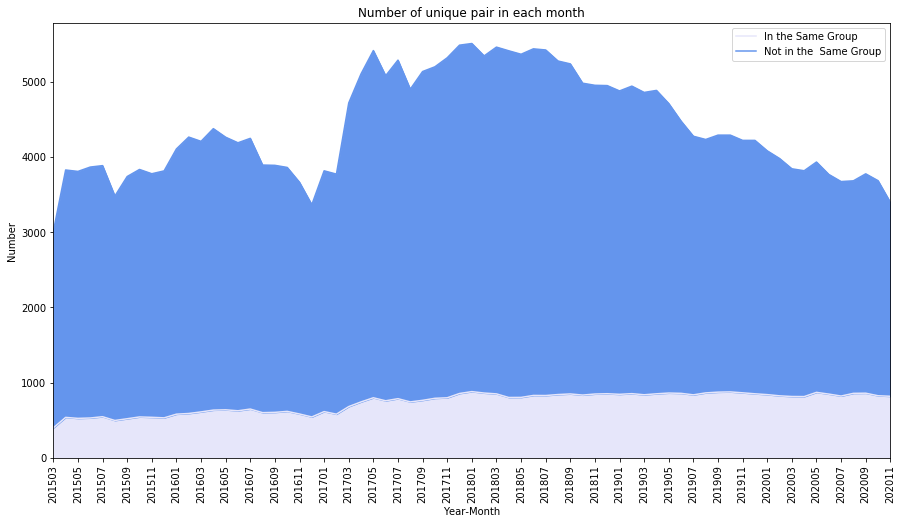

In [105]:
g = g2.get_group(0)
def s(g):
    return g.groupby('sBgroup').size().to_frame().T
idMonth = g2.apply(s).reset_index()
timeId['yearmonth'] = timeId['date'].astype(str)
timeId['yearmonth'] = timeId['yearmonth'].str[0:6]
MonthtimeId = timeId[['t_Month','yearmonth']].drop_duplicates().reset_index(drop = True)
mapdict = dict(zip(MonthtimeId.t_Month,MonthtimeId.yearmonth))
idMonth['yearmonth'] = idMonth['t_Month'].map(mapdict)
labels = idMonth.yearmonth.to_list()
tickvalues = idMonth.t_Month
idMonth = idMonth.rename(columns = {0 : "Not Same Group",1:"Same Group"})
idMonth.plot.area(x= 't_Month',y = ["Same Group",
                                    "Not Same Group"],figsize=(15,8) ,stacked = True , colors =[ 'lavender',"cornflowerblue"])
plt.xticks(ticks = tickvalues[::-2],labels = labels[::-2], rotation='vertical')
plt.ylabel('Number')
plt.xlabel('Year-Month')
plt.legend(["In the Same Group","Not in the  Same Group"])
plt.title("Number of unique pair in each month")
pathS = r"G:\Dropbox\Dropbox\Connected Stocks\Final Report"
plt.savefig(pathS + '\\idMonth.eps', bbox_inches='tight')
plt.savefig(pathS + '\\idMonth.png', bbox_inches='tight')

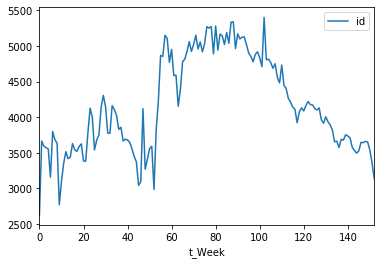

In [216]:
idWeek = g1.id.size().to_frame().reset_index()
idWeek.plot(x= 't_Week',y = 'id')

In [217]:
df3.id.max(),df3.jalaliDate.max(),df3.groupby('id').size().mean()

(10989, 13990826, 472.4282653160612)

In [218]:
df1.columns

Index(['date', 'jalaliDate', 'id_x', 'id_y', 'week_of_year', 'month_of_year',
       'year_of_year', 'group_name_x', 'group_name_y', 'Ret_x', 'Ret_y',
       'SizeRatio', 'MarketCap_x', 'MarketCap_y', '2-Residual_x',
       '2-Residual_y', '4-Residual_x', '4-Residual_y', '5-Residual_x',
       '5-Residual_y', 'Percentile_Rank_x', 'Percentile_Rank_y',
       'BookToMarket_x', 'BookToMarket_y', 'BGId_x', 'BGId_y', 'position_x',
       'position_y', 'FCAPf', 'FCA', 'Sametype', 'Holder_act', 'size1',
       'size2', 'SameSize', 'sgroup', 'sBgroup', 'sposition', 'B/M1', 'B/M2',
       'SameB/M', 'Monthlyρ_2', 'Monthlyρ_4', 'Monthlyρ_5', 'MonthlySizeRatio',
       'MonthlyMarketCap_x', 'MonthlyMarketCap_y', 'MonthlyPercentile_Rank_x',
       'MonthlyPercentile_Rank_y', 'Monthlysize1', 'Monthlysize2',
       'MonthlySameSize', 'MonthlyB/M1', 'MonthlyB/M2', 'MonthlySameB/M',
       'MonthlyFCAPf', 'MonthlyFCA', 'Monthlyρ_2_f', 'Monthlyρ_4_f',
       'Monthlyρ_5_f', 'Weeklyρ_2', 'Weeklyρ_4', 'W

In [226]:
# a1 = df3.FCA.describe().to_frame().rename(columns ={'FCA':'Daily'}).T
a1 = (df1.WeeklyFCA.describe().to_frame().rename(columns ={'WeeklyFCA':'FortnightlyFCA'}).T)
a1 = a1.append(df2.MonthlyFCA.describe().to_frame().rename(columns ={'MonthlyFCA':'MonthlyFCA'}).T)
a1 = a1.append(df2[df2.sBgroup == 1].MonthlyFCA.describe().to_frame().rename(columns ={'MonthlyFCA':'MonthlyFCA-Same'}).T)
a1 = a1.append(df2[df2.sBgroup == 0].MonthlyFCA.describe().to_frame().rename(columns ={'MonthlyFCA':'MonthlyFCA-NSame'}).T)
a1 = a1.append(df2[df2.sgroup == 1].MonthlyFCA.describe().to_frame().rename(columns ={'MonthlyFCA':'MonthlyFCA-SameI'}).T)
a1 = a1.append(df2[df2.sgroup == 0].MonthlyFCA.describe().to_frame().rename(columns ={'MonthlyFCA':'MonthlyFCA-NSameI'}).T)
a1
# a = df3.FCAPf.describe().to_frame().rename(columns ={'FCAPf':'Daily'}).T
a = (df1.WeeklyFCAPf.describe().to_frame().rename(columns ={'WeeklyFCAPf':'FortnightlyFCAP'}).T)
a = a.append(df2.MonthlyFCAPf.describe().to_frame().rename(columns ={'MonthlyFCAPf':'MonthlyFCAP'}).T)
a = a.append(df2[df2.sBgroup == 1].MonthlyFCAPf.describe().to_frame().rename(columns ={'MonthlyFCAPf':'MonthlyFCAP-Same'}).T)
a = a.append(df2[df2.sBgroup == 0].MonthlyFCAPf.describe().to_frame().rename(columns ={'MonthlyFCAPf':'MonthlyFCAP-NSame'}).T)
a = a.append(df2[df2.sgroup == 1].MonthlyFCAPf.describe().to_frame().rename(columns ={'MonthlyFCAPf':'MonthlyFCAP-SameI'}).T)
a = a.append(df2[df2.sgroup == 0].MonthlyFCAPf.describe().to_frame().rename(columns ={'MonthlyFCAPf':'MonthlyFCAP-NSameI'}).T)
a.append(a1)

,count,mean,std,min,25%,50%,75%,max
FortnightlyFCAP,637866.0,0.142023,0.191014,0.002480,0.023622,0.054443,0.162792,0.999898
MonthlyFCAP,303971.0,0.141380,0.190383,0.002325,0.023505,0.054101,0.162105,0.999276
MonthlyFCAP-Same,50808.0,0.391161,0.259333,0.004111,0.141511,0.399633,0.601764,0.999276
MonthlyFCAP-NSame,253163.0,0.091251,0.122427,0.002325,0.021128,0.042753,0.107298,0.999155
MonthlyFCAP-SameI,46797.0,0.292090,0.258912,0.005535,0.057977,0.207699,0.497052,0.998791
MonthlyFCAP-NSameI,257174.0,0.113956,0.160493,0.002325,0.021961,0.045972,0.126881,0.999276
FortnightlyFCA,637866.0,0.168919,0.270061,0.002561,0.024800,0.058964,0.181046,4.482938
MonthlyFCA,303971.0,0.167861,0.268842,0.002422,0.024675,0.058488,0.179591,4.341813
MonthlyFCA-Same,50808.0,0.486339,0.417487,0.003479,0.162767,0.432390,0.685042,4.341813
MonthlyFCA-NSame,253163.0,0.103945,0.165411,0.002422,0.022190,0.045329,0.112362,2.812707


In [18]:
df1['LnWeeklyFCA'] = np.log(df1['WeeklyFCA'])
df1['LnWeeklyFCAPf'] = np.log(df1['WeeklyFCAPf'])
df2['LnMonthlyFCA'] = np.log(df2['MonthlyFCA'])
df2['LnMonthlyFCAPf'] = np.log(df2['MonthlyFCAPf'])




In [19]:
# a1 = df3.FCA.describe().to_frame().rename(columns ={'FCA':'Daily'}).T
a1 = (df1['LnWeeklyFCA'].describe().to_frame().rename(columns ={'LnWeeklyFCA':'FortnightlyLnFCA'}).T)
a1 = a1.append(df1['LnWeeklyFCAPf'].describe().to_frame().rename(columns ={'LnWeeklyFCAPf':'FortnightlyLnFCAf'}).T)
a1 = a1.append(df2['LnMonthlyFCA'].describe().to_frame().rename(columns ={'LnMonthlyFCA':'MonthlyLnFCA'}).T)
a1 = a1.append(df2['LnMonthlyFCAPf'].describe().to_frame().rename(columns ={'LnMonthlyFCAPf':'MonthlyLnFCAf'}).T)
a1

,count,mean,std,min,25%,50%,75%,max
FortnightlyLnFCA,636641.0,-2.633884,1.276190,-5.967361,-3.694318,-2.827916,-1.707159,1.500279
FortnightlyLnFCAf,636641.0,-2.715345,1.232496,-5.999429,-3.743012,-2.907611,-1.813379,-0.000102
MonthlyLnFCA,303419.0,-2.640234,1.274967,-6.023244,-3.699082,-2.836089,-1.715065,1.468292
MonthlyLnFCAf,303419.0,-2.720421,1.232041,-6.063916,-3.748325,-2.914499,-1.817795,-0.000724


In [49]:
np.log(10)

2.302585092994046

In [20]:
# a1 = df3.FCA.describe().to_frame().rename(columns ={'FCA':'Daily'}).T
a1 = (df1['WeeklyFCA*'].describe().to_frame().rename(columns ={'WeeklyFCA*':'FortnightlyFCA*'}).T)
a1 = a1.append(df1['WeeklyFCAP*'].describe().to_frame().rename(columns ={'WeeklyFCAP*':'FortnightlyFCAP*'}).T)
a1 = a1.append(df2['MonthlyFCA*'].describe().to_frame().rename(columns ={'MonthlyFCA*':'MonthlyFCA*'}).T)
a1 = a1.append(df2['MonthlyFCAP*'].describe().to_frame().rename(columns ={'MonthlyFCAP*':'MonthlyFCAP*'}).T)
a1

,count,mean,std,min,25%,50%,75%,max
FortnightlyFCA*,636641.0,-0.018267,0.991048,-1.731915,-0.876355,-0.019060,0.834877,1.731942
FortnightlyFCAP*,636641.0,-0.017999,0.990443,-1.731945,-0.875309,-0.019129,0.836144,1.731954
MonthlyFCA*,303419.0,-0.021280,0.993286,-1.732009,-0.883348,-0.022547,0.834721,1.731995
MonthlyFCAP*,303419.0,-0.019900,0.993216,-1.731993,-0.881682,-0.021122,0.838788,1.731998


In [57]:
g = gg.get_group(2018)

In [22]:
def f(g):
    return len(g.drop_duplicates('id').groupby('id').size()),len(set(g.id_x)|set(g.id_y))

In [26]:
gg = df3.groupby("year_of_year")
gg.apply(f).to_frame()

,0
year_of_year,
2015,"(4259, 234)"
2016,"(5295, 256)"
2017,"(6258, 311)"
2018,"(6766, 333)"
2019,"(6180, 335)"
2020,"(4873, 335)"


In [43]:
df4

,jalaliDate,date,SMB,HML,Winner_Loser,Market_return
0,13870917,20081207,0.712311,0.739965,-0.069096,-0.520794
1,13870918,20081208,-0.046287,-5.709388,0.393674,-0.452330
2,13870920,20081210,1.385559,1.436819,-0.585454,-0.720635
3,13870923,20081213,0.799455,1.256421,-0.691074,-0.558529
4,13870924,20081214,1.286851,1.034870,-0.451144,-0.738859
5,13870925,20081215,0.875425,1.143133,-0.766409,-0.183002
6,13870926,20081216,0.415223,0.220430,-1.330472,-0.244075
7,13870930,20081220,1.188108,0.629171,0.063768,-0.134175
8,13871001,20081221,0.322903,0.081611,-0.882849,-0.062097
9,13871002,20081222,0.216645,0.427862,-0.622797,-0.219169


In [38]:
df4 = pd.read_excel(r"H:\Economics\Finance(Prof.Heidari-Aghajanzadeh)\Data\Factors-Daily.xlsx")

In [49]:
df4[df4.date>= 20150325][['SMB', 'HML', 'Winner_Loser', 'Market_return']].describe().T

,count,mean,std,min,25%,50%,75%,max
SMB,1374.0,0.187152,1.466739,-5.637538,-0.578272,0.149463,0.831473,19.522572
HML,1374.0,-0.121186,1.394512,-4.896457,-0.846344,-0.164588,0.471354,23.201308
Winner_Loser,1374.0,0.689751,1.060299,-2.608853,0.041720,0.621027,1.227869,8.583872
Market_return,1374.0,0.237661,1.232819,-4.712174,-0.215368,0.069333,0.563720,4.892761


In [17]:
df2['T_Q'] = np.nan
for i in range(int(df2.t_Month.max()/3)+1):
    df2.loc[(df2.t_Month >= 3*i)&(df2.t_Month < 3*(i+1)),'T_Q'] = i
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [18]:
i = 0
df2.loc[(df2.t_Month >= i)&(df2.t_Month < 3*(i+1))]

,date,jalaliDate,id_x,id_y,week_of_year,month_of_year,year_of_year,group_name_x,group_name_y,Ret_x,...,WeeklyFCA*,MonthlyFCAP*,MonthlyFCA*,FCAP**,FCA**,WeeklyFCAP**,WeeklyFCA**,MonthlyFCAP**,MonthlyFCA**,T_Q
20,20150331,13940111,0,11,14,3,2015,انبوه سازی، املاک و مستغلات,فلزات اساسی,-0.305344,...,0.161966,0.205946,0.172418,-1.147934,-1.147934,-1.210396,-1.210396,-0.602722,-0.602722,0.0
21,20150429,13940209,0,11,18,4,2015,انبوه سازی، املاک و مستغلات,فلزات اساسی,0.788022,...,0.112139,0.154773,0.115344,-1.107299,-1.107299,-1.373139,-1.373139,-1.532343,-1.532343,0.0
22,20150531,13940310,0,11,22,5,2015,انبوه سازی، املاک و مستغلات,فلزات اساسی,0.000000,...,0.109208,0.147040,0.108277,-1.168251,-1.168251,-1.027311,-1.027311,-1.195227,-1.195227,0.0
35,20150331,13940111,0,32,14,3,2015,انبوه سازی، املاک و مستغلات,ماشین آلات و دستگاه‌های برقی,-0.305344,...,1.401761,1.578473,1.405663,0.740065,0.740065,0.746066,0.746066,0.732684,0.732684,0.0
36,20150429,13940209,0,32,18,4,2015,انبوه سازی، املاک و مستغلات,ماشین آلات و دستگاه‌های برقی,0.788022,...,1.407331,1.573697,1.397423,0.925455,0.922465,1.004723,1.004723,0.768571,0.768571,0.0
37,20150531,13940310,0,32,22,5,2015,انبوه سازی، املاک و مستغلات,ماشین آلات و دستگاه‌های برقی,0.000000,...,1.421659,1.577521,1.417939,1.051042,1.045061,0.982296,0.982296,0.971928,0.971928,0.0
106,20150331,13940111,0,48,14,3,2015,انبوه سازی، املاک و مستغلات,محصولات شیمیایی,-0.305344,...,-1.566879,-1.643727,-1.571814,-1.077890,-1.077890,-1.108412,-1.108412,-1.062875,-1.062875,0.0
107,20150429,13940209,0,48,18,4,2015,انبوه سازی، املاک و مستغلات,محصولات شیمیایی,0.788022,...,-1.516921,-1.632212,-1.569827,-1.001714,-1.001714,-1.024614,-1.024614,-1.110495,-1.110495,0.0
108,20150531,13940310,0,48,22,5,2015,انبوه سازی، املاک و مستغلات,محصولات شیمیایی,0.000000,...,-1.106277,-1.289676,-1.245058,0.060941,0.060941,0.129505,0.129505,-0.954302,-0.954302,0.0
183,20150331,13940111,0,67,14,3,2015,انبوه سازی، املاک و مستغلات,انبوه سازی، املاک و مستغلات,-0.305344,...,1.698017,1.574478,1.698562,0.166753,0.462557,0.656877,1.025193,0.189976,0.575729,0.0


In [19]:
gg = df2.groupby(['id','T_Q', 'id_x', 'id_y','group_name_x', 'group_name_y','sgroup'])

In [6]:
# g = gg.get_group((5,0))

In [7]:
df2.columns

Index(['date', 'jalaliDate', 'id_x', 'id_y', 'week_of_year', 'month_of_year',
       'year_of_year', 'group_name_x', 'group_name_y', 'Ret_x', 'Ret_y',
       'SizeRatio', 'MarketCap_x', 'MarketCap_y', '2-Residual_x',
       '2-Residual_y', '4-Residual_x', '4-Residual_y', '5-Residual_x',
       '5-Residual_y', 'Percentile_Rank_x', 'Percentile_Rank_y',
       'BookToMarket_x', 'BookToMarket_y', 'FCAPf', 'FCA', 'size1', 'size2',
       'SameSize', 'sgroup', 'B/M1', 'B/M2', 'SameB/M', 'Monthlyρ_2',
       'Monthlyρ_4', 'Monthlyρ_5', 'MonthlySizeRatio', 'MonthlyMarketCap_x',
       'MonthlyMarketCap_y', 'MonthlyPercentile_Rank_x',
       'MonthlyPercentile_Rank_y', 'Monthlysize1', 'Monthlysize2',
       'MonthlySameSize', 'MonthlyB/M1', 'MonthlyB/M2', 'MonthlySameB/M',
       'MonthlyFCAPf', 'MonthlyFCA', 'Monthlyρ_2_f', 'Monthlyρ_4_f',
       'Monthlyρ_5_f', 'Weeklyρ_2', 'Weeklyρ_4', 'Weeklyρ_5',
       'WeeklySizeRatio', 'WeeklyMarketCap_x', 'WeeklyMarketCap_y',
       'WeeklyPercentile_R

In [20]:
t = gg[['MonthlySizeRatio','MonthlyMarketCap_x', 'MonthlyMarketCap_y', 
    'MonthlyPercentile_Rank_x','MonthlyPercentile_Rank_y', 
    'Monthlysize1', 'Monthlysize2','MonthlySameSize', 'MonthlyFCAPf', 'MonthlyFCA',
    'MonthlyFCAP*', 'MonthlyFCA*']].mean().reset_index()
t = t.rename(columns = {'MonthlySizeRatio': 'QuarterlySizeRatio','MonthlyMarketCap_x': 'QuarterlyMarketCap_x'
                        , 'MonthlyMarketCap_y': 'QuarterlyMarketCap_y', 'MonthlyPercentile_Rank_x' : 'QuarterlyPercentile_Rank_x' 
                        ,'MonthlyPercentile_Rank_y': 'QuarterlyPercentile_Rank_y' , 'Monthlysize1': 'Quarterlysize1'
                        , 'Monthlysize2' : 'Quarterlysize2' ,'MonthlySameSize': 'QuarterlySameSize' 
                        , 'MonthlyFCAPf' : 'QuarterlyFCAPf' , 'MonthlyFCA': 'QuarterlyFCA' 
                        ,'MonthlyFCAP*' : 'QuarterlyFCAP*' , 'MonthlyFCA*' : 'QuarterlyFCA*' })

In [21]:
Qdata = df2.merge(t,on = ['id','T_Q', 'id_x', 'id_y','group_name_x', 'group_name_y','sgroup'])

In [22]:
Qdata = Qdata.drop(columns = ['MarketCap_x', 'MarketCap_y', 'Percentile_Rank_x',
       'Percentile_Rank_y', 'size1', 'size2', 'SameSize',
     'MonthlySizeRatio','MonthlyMarketCap_x', 'MonthlyMarketCap_y',
      'MonthlyPercentile_Rank_x',
       'MonthlyPercentile_Rank_y', 'Monthlysize1', 'Monthlysize2',
       'MonthlySameSize', 'MonthlyFCAPf', 'MonthlyFCA',
     'MonthlyFCAP*', 'MonthlyFCA*'])

In [24]:
Qdata.to_csv( path + "QarterlyNormalzedFCAP5.1" +".csv",index = False)

In [16]:
path

'H:\\Economics\\Finance(Prof.Heidari-Aghajanzadeh)\\Data\\Connected stocks\\\\'

In [2]:
path = r"H:\Economics\Finance(Prof.Heidari-Aghajanzadeh)\Data\\"


In [3]:
df = pd.read_csv(path + "Cleaned_Stocks_Holders_1399-09-12_From94" + ".csv")
df = df[df.jalaliDate<13990800]
df.loc[df.Number_Change=="0.0",'Percent_Change'] = "0.0"

In [4]:
(df[(df.symbol == 'وبصادر')&(df.Holder == 'سهام عدالت')&(df.Percent_Change != '0.0')])

,date,jalaliDate,symbol,stock_id,group_name,group_id,Holder,nshares,type,Percent,shrout,close_price,Number_Change,Percent_Change,Condition,Trade
2801892,20150325,13940105,وبصادر,2.832029e+16,بانکها و موسسات اعتباری,57.0,سهام عدالت,1.755813e+10,public,30.30,5.780000e+10,858.0,-,-,Orginal,Yes
2807928,20180313,13961222,وبصادر,2.832029e+16,بانکها و موسسات اعتباری,57.0,سهام عدالت,1.668414e+10,public,28.79,5.780000e+10,1005.0,-873985867.0,-1.509999999999998,Orginal,No
2808786,20180807,13970516,وبصادر,2.832029e+16,بانکها و موسسات اعتباری,57.0,سهام عدالت,1.755813e+10,public,30.30,5.780000e+10,902.0,873985867.0,1.509999999999998,Orginal,Yes
2812990,20200713,13990423,وبصادر,2.832029e+16,بانکها و موسسات اعتباری,57.0,سهام عدالت,2.704926e+10,public,15.38,1.753540e+11,4250.0,-26218685337.0,-14.920000000000002,Orginal,Yes


In [5]:
def DriveYearMonthDay(d):
    d['jalaliDate'] = d['jalaliDate'].astype(str)
    d['Year'] = d['jalaliDate'].str[0:4]
    d['Month'] = d['jalaliDate'].str[4:6]
    d['Day'] = d['jalaliDate'].str[6:8]
    d['jalaliDate'] = d['jalaliDate'].astype(int)
    return d
df = DriveYearMonthDay(df)

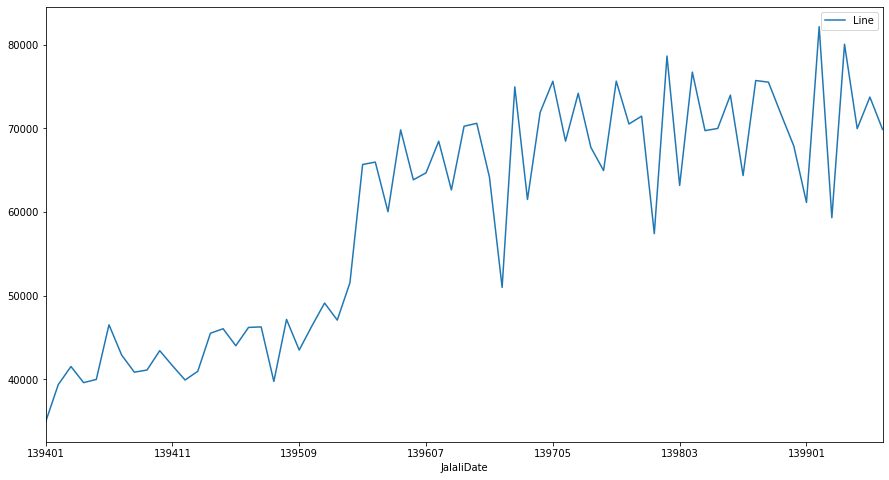

In [6]:
gg = df.groupby(['Year','Month'])
vd = gg.size().to_frame().reset_index()
vd['JalaliDate'] = vd.Year + vd.Month 
vd = vd.drop(columns = ['Year','Month' ]).rename(columns = {0:"Line"})
ax = vd.plot(x = 'JalaliDate' ,y = 'Line' ,figsize=(15,8))

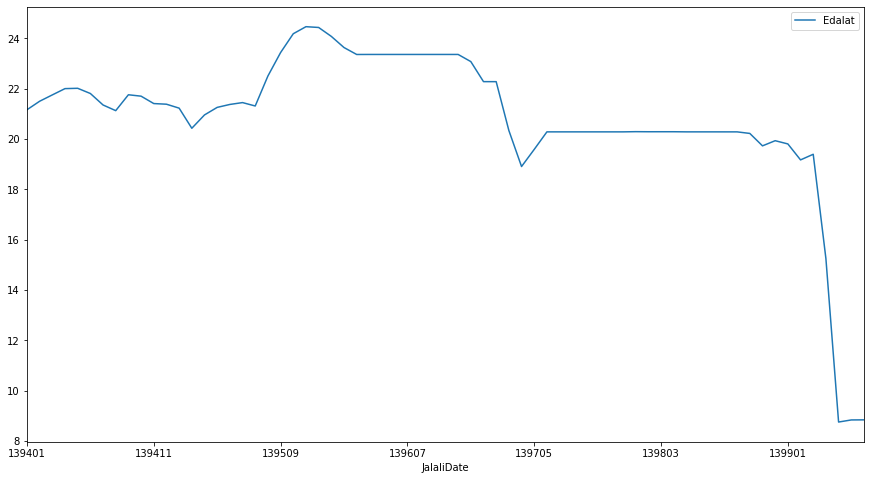

In [7]:

def Edalat(g):
    return g[g.Holder=='سهام عدالت'].Percent.mean()
    
vd = gg.apply(Edalat)
vd = vd.reset_index()
vd['JalaliDate'] = vd.Year + vd.Month 
vd = vd.drop(columns = ['Year','Month' ]).rename(columns = {0:"Edalat"})
ax = vd.plot(x = 'JalaliDate' ,y = 'Edalat' ,figsize=(15,8))

In [8]:
g = gg.get_group(('1396','01'))
set(g[g.Holder=='دولت'].symbol)

{'آسیا', 'اخابر', 'البرز', 'وبصادر', 'وبملت', 'وتجارت', 'وپست'}

In [9]:
g = gg.get_group(('1395','01'))
set(g[g.Holder=='دولت'].symbol)

{'آسیا', 'اخابر', 'البرز', 'وبصادر', 'وبملت', 'وتجارت', 'وپست'}

In [10]:
mlist = ['کارگزاری بانک انصار',
'تعاونی مصرف کارکنان بانک انصار',
'وقوام','حکمت',
 'صندوق سرمایه گذاری کارکنان حکمت',
'سرمایه گذاری مهر اقتصاد ایرانیان',
'گروه مالی مهر اقتصاد',
'وکوثر','کوثر',
'سرمایه گذاری الماس حکمت ایرانیان']

In [ ]:
"کارگزاری بانک سپه",


In [35]:
# symbols = ['خگستر',
# 'فولاد',
# 'فارس',
# 'شستا',
# 'فملی',
# 'سکرد',
# 'سمازن',
# 'وتجارت',
# 'شتران',
# 'ذوب',
# "کماسه",'خودرو']
# print(symbols)
# df[df.symbol.isin(symbols)].to_csv(path + "Sample1" + ".csv")
# df[(df.jalaliDate>13980000)&(df.jalaliDate<13980400)].to_csv(path + "Sample2-139801to139804" + ".csv")

In [21]:
len(df)

3980059

In [19]:
set(df[df.Holder.str.contains("مالی یکم")].symbol)

{'اتکام', 'البرز', 'دارا یکم', 'وبصادر', 'وبملت', 'وتجارت'}

In [36]:
set(df[df.Holder == 'دولت'].symbol )

{'آسیا', 'اخابر', 'البرز', 'وبصادر', 'وبملت', 'وتجارت', 'وپست'}

In [11]:
set(df[(df.Holder == "بانک سپه")].symbol)

{'بجهرم', 'رکیش', 'وامید', 'وبصادر'}

In [12]:
set(df[(df.Holder.isin(mlist))].symbol)

{'آسام',
 'آکنتور',
 'بترانس',
 'تایرا',
 'تکنو',
 'ثاژن',
 'ثباغ',
 'حریل',
 'خاهن',
 'خزامیا',
 'خمهر',
 'داریک',
 'دبالک',
 'سهگمت',
 'شپنا',
 'فاذر',
 'فمراد',
 'فیروزا',
 'لابسا',
 'لپارس',
 'مرقام',
 'ملت',
 'نبورس',
 'وانصار',
 'وثنو',
 'وحکمت',
 'ورنا',
 'وغدیر',
 'ومهر',
 'وپست',
 'وکوثر',
 'چکاوه',
 'کاما',
 'کروی',
 'کساپا',
 'کفپارس',
 'کوثر',
 'کگل',
 'کیان',
 'یاقوت'}

In [18]:
df[(df.jalaliDate>13951200)&(df.Holder == "وانصار")].tail()

,date,jalaliDate,symbol,stock_id,group_name,group_id,Holder,nshares,type,Percent,shrout,close_price,Number_Change,Percent_Change,Condition,Trade,Year,Month,Day
3898521,20181002,13970710,کوثر,2.227560e+16,بیمه وصندوق بازنشستگی به جزتامین اجتماعی,66.0,وانصار,41704826.0,bank,1.66,2.500000e+09,2705.0,0.0,0.0,Orginal,Yes,1397,07,10
3898530,20181003,13970711,کوثر,2.227560e+16,بیمه وصندوق بازنشستگی به جزتامین اجتماعی,66.0,وانصار,41704826.0,bank,1.66,2.500000e+09,2705.0,0.0,0.0,Orginal,No,1397,07,11
3898539,20181006,13970714,کوثر,2.227560e+16,بیمه وصندوق بازنشستگی به جزتامین اجتماعی,66.0,وانصار,41704826.0,bank,1.66,2.500000e+09,2705.0,0.0,0.0,Orginal,No,1397,07,14
3898548,20181007,13970715,کوثر,2.227560e+16,بیمه وصندوق بازنشستگی به جزتامین اجتماعی,66.0,وانصار,41704826.0,bank,1.66,2.500000e+09,2570.0,0.0,0.0,Orginal,Yes,1397,07,15
3898557,20181008,13970716,کوثر,2.227560e+16,بیمه وصندوق بازنشستگی به جزتامین اجتماعی,66.0,وانصار,41704826.0,bank,1.66,2.500000e+09,2442.0,0.0,0.0,Orginal,Yes,1397,07,16


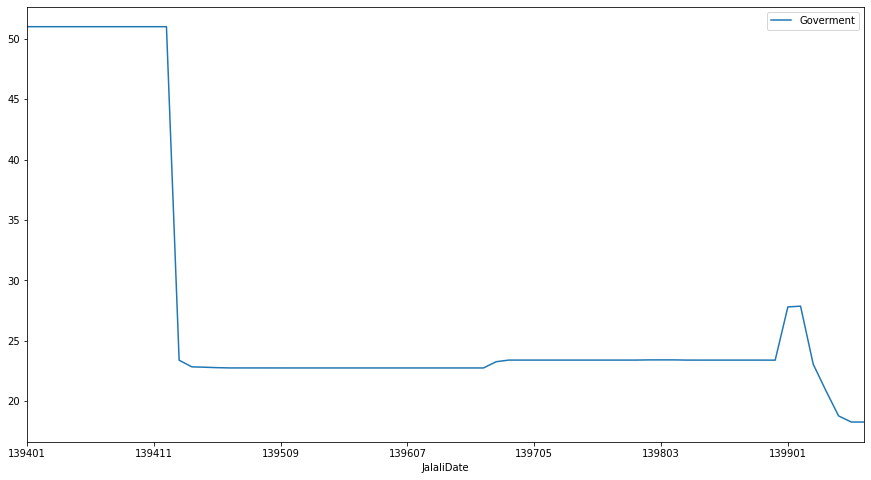

In [11]:

def Goverment(g):
    return g[g.Holder=='دولت'].Percent.mean()
    
vd = gg.apply(Goverment)
vd = vd.reset_index()
vd['JalaliDate'] = vd.Year + vd.Month 
vd = vd.drop(columns = ['Year','Month' ]).rename(columns = {0:"Goverment"})
ax = vd.plot(x = 'JalaliDate' ,y = 'Goverment',figsize=(15,8))

In [ ]:

def Goverment(g):
    return g[g.Holder=='بانک سپه'].Percent.mean()
    
vd = gg.apply(Goverment)
vd = vd.reset_index()
vd['JalaliDate'] = vd.Year + vd.Month 
vd = vd.drop(columns = ['Year','Month' ]).rename(columns = {0:"Goverment"})
ax = vd.plot(x = 'JalaliDate' ,y = 'Goverment',figsize=(15,8))

([<matplotlib.axis.XTick at 0x1db823e4e48>,
 <a list of 14 Text xticklabel objects>)

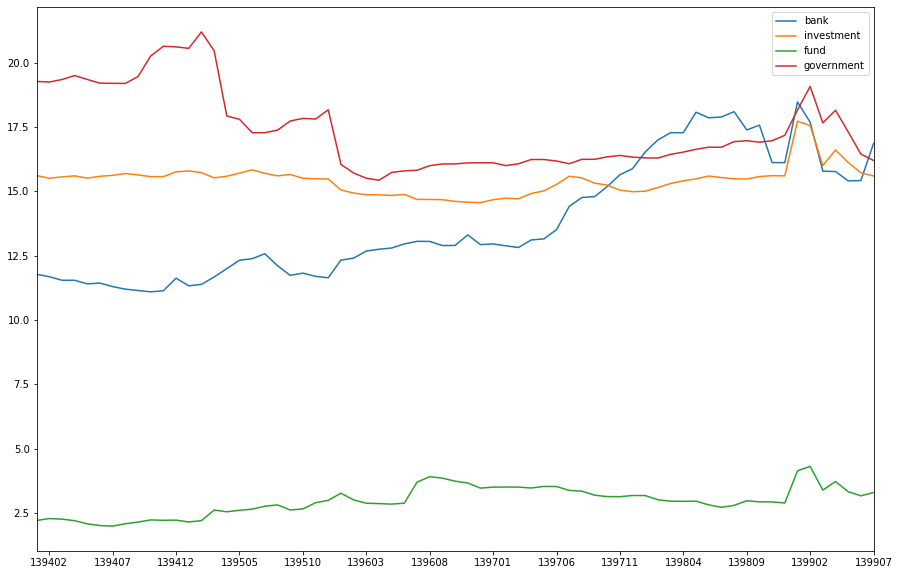

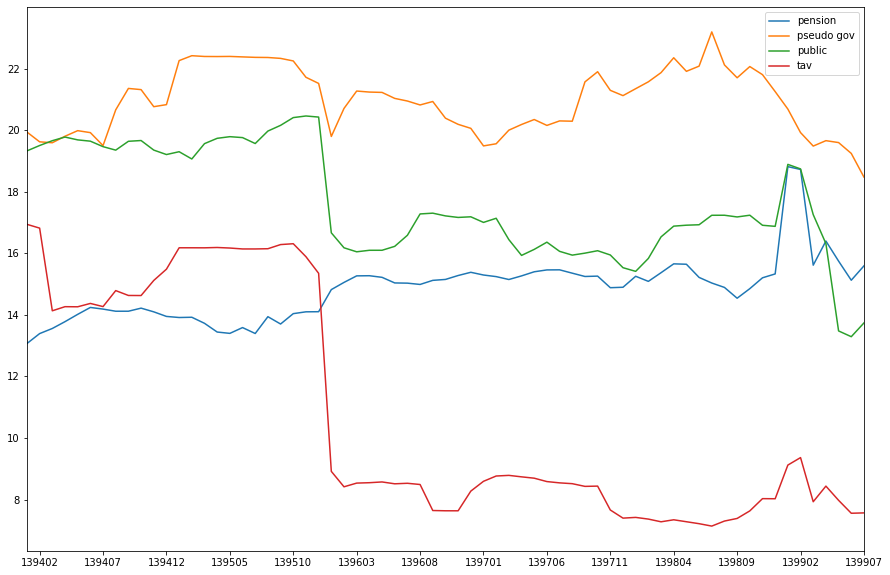

In [12]:
gg = df.groupby(['Year','Month'])
def type(g):
    return g.groupby('type')['Percent'].mean()
    
vd = gg.apply(type)
vd = vd.reset_index()
vd['JalaliDate'] = vd.Year + vd.Month 
vd = vd.drop(columns = ['Year','Month'])
gvd = vd.groupby('type')
tt = pd.DataFrame()
tlist = ['bank','fund', 'government', 'individual', 'insurance',
'investment', 'pension','private', 'pseudo gov', 'public', 'tav']

for i in tlist:
    t = gvd.get_group(i).rename(columns = {'Percent':i}).drop(columns = ['type'])
    if len(tt) != 0 :
        tt = tt.merge(t,on = 'JalaliDate')
        continue
    tt = t
tt['JalaliDate'] = tt.JalaliDate.astype(str)
tickvalues = tt.index
labels = tt['JalaliDate']
ax = tt.plot(y =['bank','investment','fund', 'government'],use_index = True ,figsize=(15,10))
plt.xticks(ticks = tickvalues[::-5],labels = labels[::-5])
ax = tt.plot(y =['pension','pseudo gov', 'public', 'tav'],use_index = True ,figsize=(15,10))
plt.xticks(ticks = tickvalues[::-5],labels = labels[::-5])

In [6]:
gg = df.groupby(['Year','Month'])


In [13]:
len(df[((df.type == 'fund')|(df.type == 'ETF'))&(df.Percent_Change != "0.0")&(df.jalaliDate >13990511 )])


543

In [2]:
path = r"H:\Economics\Finance(Prof.Heidari-Aghajanzadeh)\Data\Psudo\\"

In [3]:
df = pd.read_csv(path + "RWeeklyNormalzedFCAP5.1" + ".csv")

In [7]:
len(df),len(df1)

(832680, 1454898)

In [22]:
a = df.groupby('nId').size().to_frame()
b = df1.groupby('id').size().to_frame()

In [23]:
a, left_index=True, right_index=True

,0
nId,
0,49
1,9
2,9
3,102
4,7
5,95
6,63
7,6
8,176


In [28]:
c = b.merge(a,how = 'outer', left_index=True, right_index=True)
c['d'] = c["0_x"] - c["0_y"]

In [35]:
c[c.d == 206]

,0_x,0_y,d
5275,207,1.0,206.0
6932,207,1.0,206.0


In [16]:
path = r"C:\Project\Connected Stocks\\"
n = path + "FixedIcomeFunds" + ".xlsx"
fdf = pd.read_excel(n)

In [18]:
def convert_ar_characters(input_str):

    mapping = {
        'ك': 'ک',
        'گ':'گ',
        'دِ': 'د',
        'بِ': 'ب',
        'زِ': 'ز',
        'ذِ': 'ذ',
        'شِ': 'ش',
        'سِ': 'س',
        'ى': 'ی',
        'ي': 'ی'
    }
    return _multiple_replace(mapping, input_str)


def _multiple_replace(mapping, text):
    pattern = "|".join(map(ree.escape, mapping.keys()))
    return ree.sub(pattern, lambda m: mapping[m.group()], str(text))

In [20]:
fdf['name'] = fdf['name'].apply(lambda x: convert_ar_characters(x))

In [31]:
mlist = fdf.name.to_list()

mlist = fdf[~fdf.name.str.contains("\u200c")]

# for i in mlist:
#     if i.str.contains("\u200c"):
#         print(i)

In [35]:
x = pd.DataFrame()

In [40]:
x.append(x)
len(x)

0

In [37]:
x.append(mlist)
mlist.append(x)

,name
4,ارزش آفرین گلرنگ
5,نیکوکاری لوتوس رویان
6,مشترک افق کارگزاری بانک خاورمیانه
7,قابل معامله سپهر خبرگان نفت
8,امین سامان
9,نیکوکاری دانشگاه تهران
11,اعتماد ملل
12,قابل معامله با درآمد ثابت تصمیم
13,اعتبار آفرین ایرانیان
14,زمرد نو ویرا ذوب آهن


In [ ]:
((df.type == 'fund')|(df.type == 'ETF'))&

In [56]:
df[(df.Holder.str.contains('گنجینه الماس پایدار'))]

,date,jalaliDate,symbol,stock_id,group_name,group_id,Holder,nshares,type,Percent,shrout,close_price,Number_Change,Percent_Change,Condition,Trade,Year,Month,Day


In [49]:
df[(df.Holder == 'صندوق سرمایه گذاری مشترک صبای هدف')&(df.Percent_Change != "0.0")&(df.jalaliDate >13990511 )]

,date,jalaliDate,symbol,stock_id,group_name,group_id,Holder,nshares,type,Percent,shrout,close_price,Number_Change,Percent_Change,Condition,Trade,Year,Month,Day
45410,20200912,13990622,آساس,6.668266e+16,صندوق سرمایه گذاری قابل معامله,68.0,صندوق سرمایه گذاری مشترک صبای هدف,501151.0,fund,1.0,1.000000e+09,163605.0,-347523.0,-0.69,Orginal,Yes,1399,06,22


In [13]:
path = r"H:\Economics\Finance(Prof.Heidari-Aghajanzadeh)\Data\PriceLimit\RWeeklyNormalzedFCAP5.1.csv"

In [14]:
dd = pd.read_csv(path)

In [16]:
dd.columns

Index(['index', 'id', 'Unnamed: 1', '2-Residual_x', '2-Residual_y',
       '4-Residual_x', '4-Residual_y', '5-Residual_x', '5-Residual_y', 'FCA',
       'FCA*', 'FCAP*', 'FCAPf', 'Holder_id_x', 'Holder_id_y', 'MarketCap_x',
       'MarketCap_y', 'MonthlyFCAP*', 'MonthlyFCAPf_x', 'MonthlyFCAPf_y',
       'MonthlyFCA_x', 'MonthlyFCA_y', 'MonthlyMarketCap_x',
       'MonthlyMarketCap_y', 'MonthlyPercentile_Rank_x',
       'MonthlyPercentile_Rank_y', 'MonthlySameSize', 'MonthlySizeRatio',
       'Monthlysize1', 'Monthlysize2', 'Monthlyρ_2', 'Monthlyρ_2_f',
       'Monthlyρ_4', 'Monthlyρ_4_f', 'Monthlyρ_5', 'Monthlyρ_5_f',
       'Percentile_Rank_x', 'Percentile_Rank_y', 'RSymbol', 'Ret_x', 'Ret_y',
       'SameSize', 'SizeRatio', 'WeeklyFCA', 'WeeklyFCA*', 'WeeklyFCAP*',
       'WeeklyFCAPf', 'WeeklyMarketCap_x', 'WeeklyMarketCap_y',
       'WeeklyPercentile_Rank_x', 'WeeklyPercentile_Rank_y', 'WeeklySameSize',
       'WeeklySizeRatio', 'Weeklysize1', 'Weeklysize2', 'Weeklyρ_2',
       'We

In [22]:
gg = dd.groupby('id')
dd["Weeklyρ_5_f"] = gg['Weeklyρ_5'].shift(-1)

In [24]:
dd.drop(columns = ['Unnamed: 1']).to_csv(path,index = False)